### 🌍 Exploring the Health Burden of Ambient PM₂.₅ Pollution (2010–2019)
In this section, we import the required Python libraries and load our cleaned dataset.  
We also filter the data to include:
- **Risk factor**: Ambient particulate matter pollution
- **Measure**: DALYs
- **Years**: 2010–2019
- **Causes**: Cardiovascular diseases, Respiratory diseases, Stroke
- **Countries**: The 25 selected countries

This prepares the dataset for our visual analysis.

### 📦 Importing Libraries & Setting Up Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline
daly_df = pd.read_csv("../1_datasets/cleaned_datasets/clean_gbd_health.csv")
daly_df.head()

,measure,Country,cause,Risk-Exposure-Impact,metric,Year,measure Val,upper,lower
0,DALYs (Disability-Adjusted Life Years),China,Stroke,Ambient particulate matter pollution,Percent,2010,0.221882,0.296283,0.128691
1,DALYs (Disability-Adjusted Life Years),China,Stroke,Ambient particulate matter pollution,Rate,2010,793.957477,1068.976845,455.632535
2,DALYs (Disability-Adjusted Life Years),China,Stroke,Ambient particulate matter pollution,Percent,2011,0.234283,0.307520,0.138086
3,DALYs (Disability-Adjusted Life Years),China,Stroke,Ambient particulate matter pollution,Rate,2011,835.920051,1110.785446,492.084815
4,DALYs (Disability-Adjusted Life Years),China,Stroke,Ambient particulate matter pollution,Percent,2012,0.249782,0.321437,0.151426


### 📊 Visualization 1: Total DALYs from Ambient PM₂.₅ by Disease and Country

In this step, we produce a **stacked bar plot** showing the total DALYs for each combination of country.  
This view highlights:
- Countries with the highest overall burde

It’s a comparative view to see the scale and pattern of disease burden.

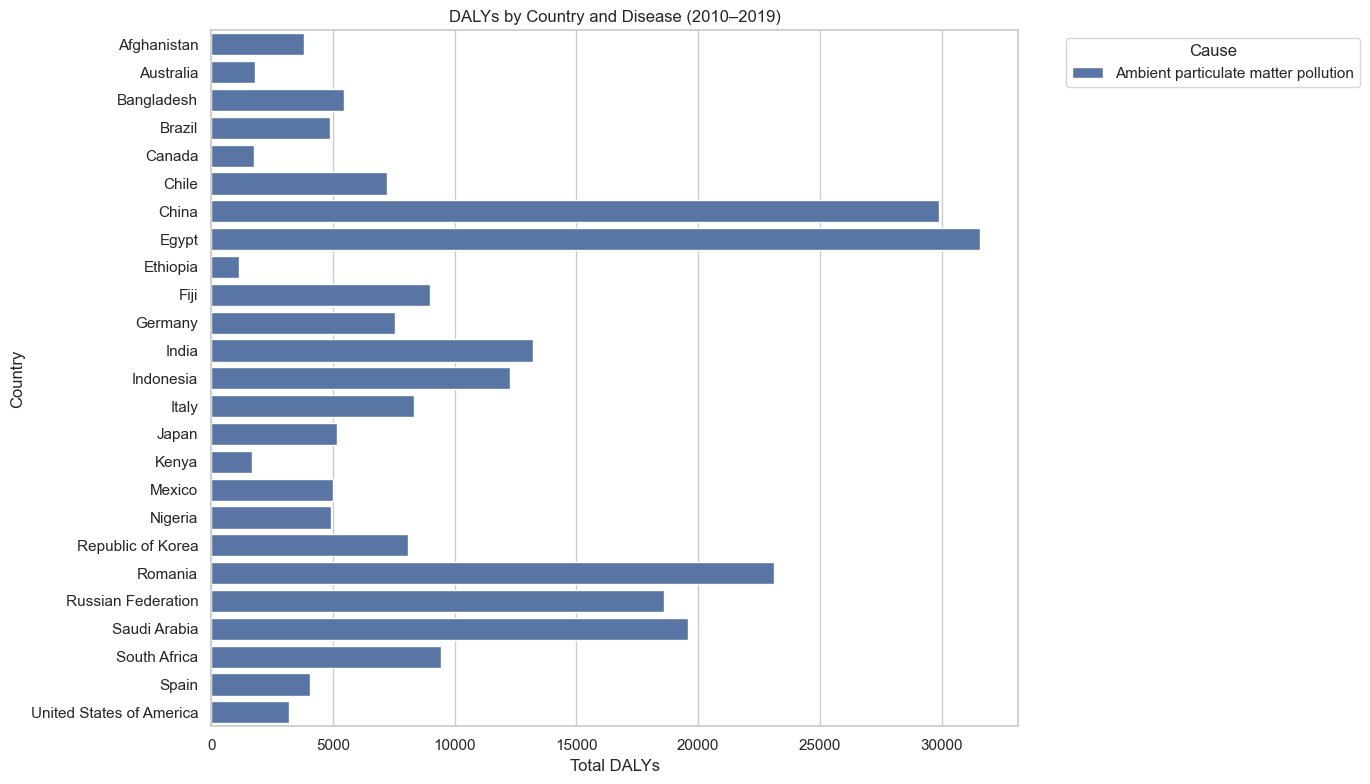

In [13]:
country_cause = (
    daly_df.groupby(["Country", "Risk-Exposure-Impact"])["measure Val"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(14, 8))
sns.barplot(
    data=country_cause, y="Country", x="measure Val", hue="Risk-Exposure-Impact"
)
plt.title("DALYs by Country and Disease (2010–2019)")
plt.xlabel("Total DALYs")
plt.ylabel("Country")
plt.legend(title="Cause", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

### 📊 Visualization 2: Breakdown by Country and Disease

Here, we create a **stacked bar plot** that shows, for each country, how the total DALYs (2010–2019) from ambient PM₂.₅ exposure are distributed among:
- Cardiovascular diseases
- Respiratory diseases
- Stroke

This visualization helps us understand which disease category contributes most to the burden in each country.

C:\Users\Dell\AppData\Local\Temp\ipykernel_25276\51578530.py:14: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Temp\ipykernel_25276\51578530.py:14: UserWarning: Glyph 8325 (\N{SUBSCRIPT FIVE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Dell\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8325 (\N{SUBSCRIPT FIVE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


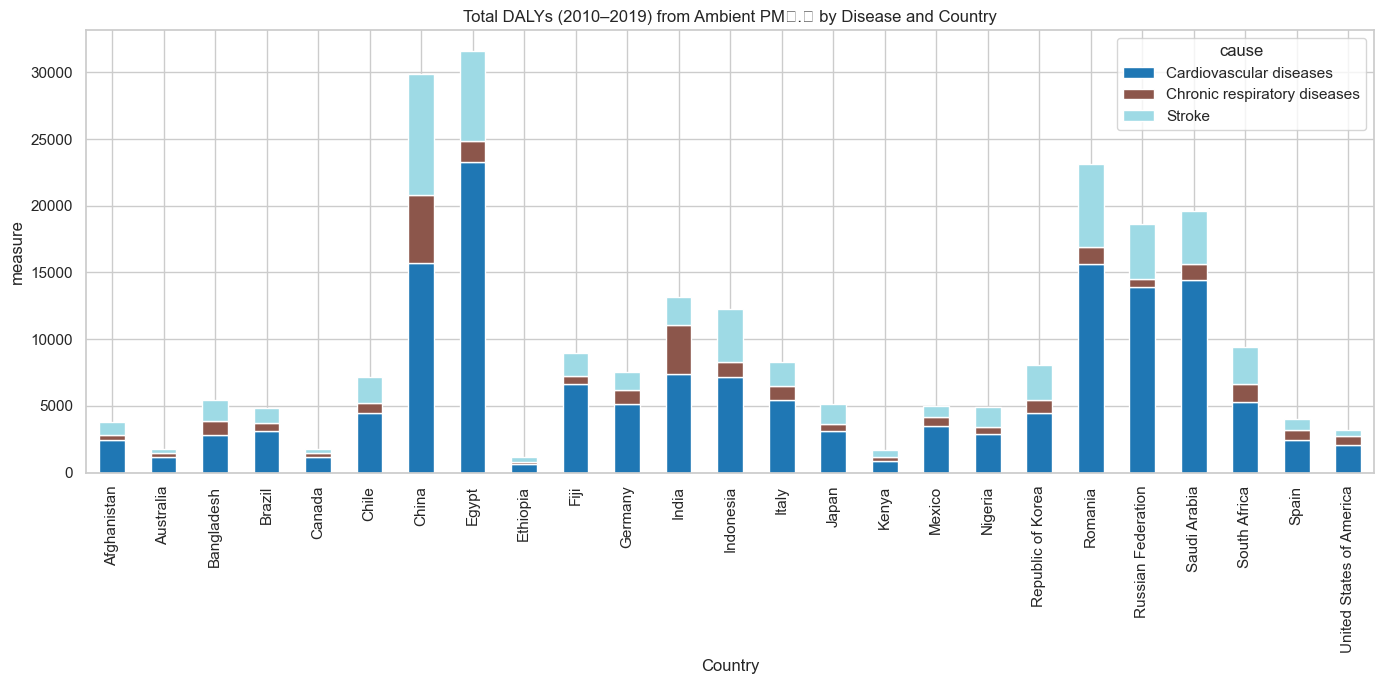

In [ ]:
country_cause = daly_df.groupby(["Country", "cause"])["measure Val"].sum().reset_index()

pivot_df = country_cause.pivot(
    index="Country", columns="cause", values="measure Val"
).fillna(0)

pivot_df.plot(kind="bar", stacked=True, figsize=(14, 7), colormap="tab20")

plt.title("Total DALYs (2010–2019) from Ambient PM2.5 by Disease and Country")
plt.ylabel("measure")
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 📊 Visualization 3: Total DALYs per Country Over Time

Finally, we create a **heatmap** showing how total DALYs attributable to ambient PM₂.₅ changed from 2010 to 2019 for each country.  
This helps us explore:
- Temporal trends in DALYs burden
- Whether certain countries experienced increases, stability, or decreases over the decade

Each cell represents the total DALYs for a country in a specific year.



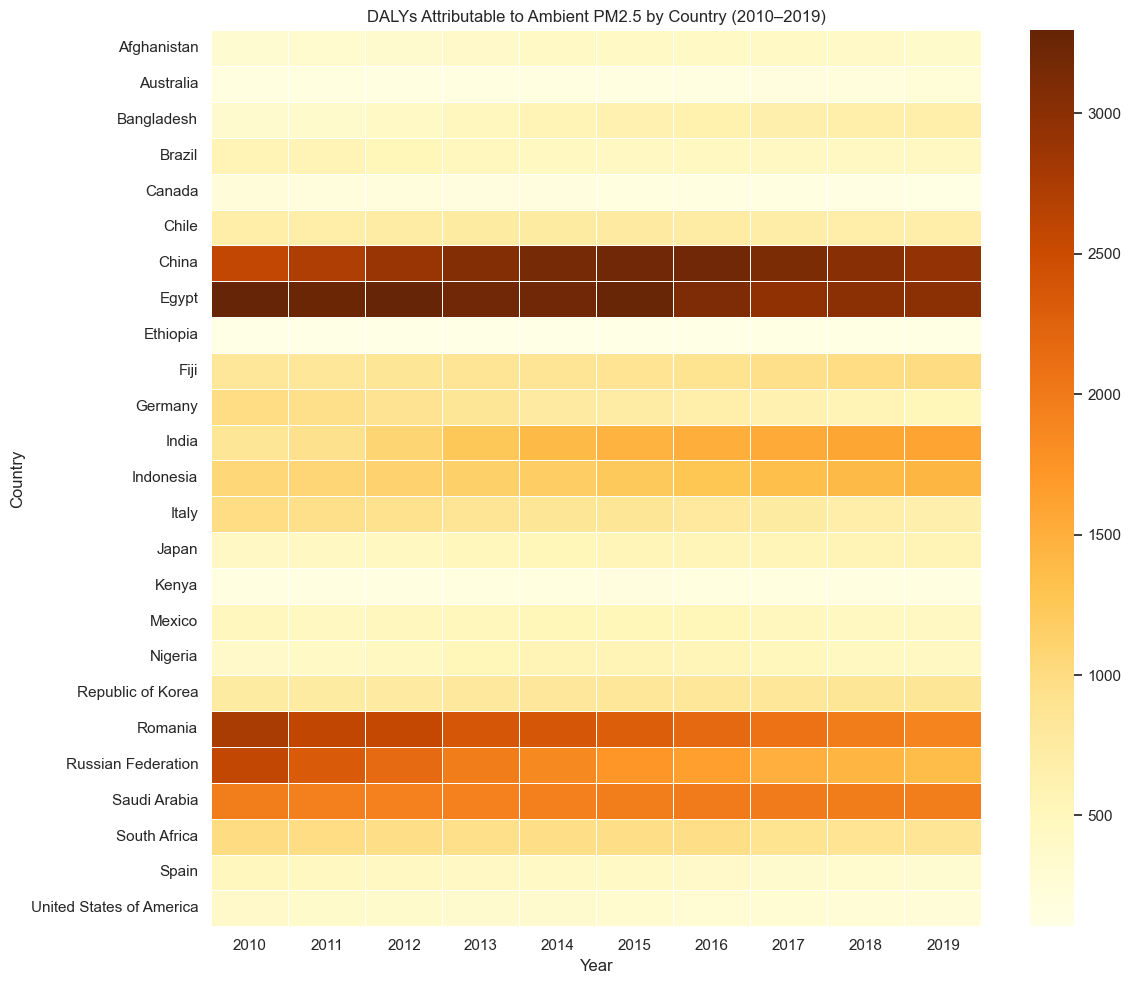

In [20]:
country_year = daly_df.groupby(["Country", "Year"])["measure Val"].sum().reset_index()
heatmap_data = country_year.pivot(index="Country", columns="Year", values="measure Val")

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=False, cmap="YlOrBr", linewidths=0.5)
plt.title("DALYs Attributable to Ambient PM2.5 by Country (2010–2019)")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

📌 *These visualizations together provide a comprehensive exploration of the health burden from ambient PM₂.₅ across diseases, countries, and time.*